# Project: Nutritional Analysis of McDonald's Menu Items


This project will analyze McDonald's nutritional data using Python, SQLite, and data visualization. Here's how you can structure it:


### Objective:

- Analyze nutritional data from McDonald's menu items to uncover insights, particularly around sodium and other key nutrients.

# Step 1: Project Setup

In [7]:
# Ensure you have the necessary libraries installed, including pandas, sqlite3 (comes with Python), seaborn, and matplotlib.

#! pip install pandas seaborn matplotlib

- Obtain the Data:

Download the McDonald's nutritional data CSV file from Kaggle.
Create Project Structure:

- Set up a project directory with folders for data, scripts, and notebooks.

## Step 2: Data Preparation and Database Creation

### Load CSV Data with Pandas

In [5]:
import pandas as pd
data = pd.read_csv('data/mcdonalds_nutrition.csv')
data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


### Create a SQLite database to store the data

In [8]:

import sqlite3
conn = sqlite3.connect('data/mcdonalds_db.sqlite')


### Save DataFrame to SQLite Database

In [9]:
# Use to_sql() to save the DataFrame as a table
data.to_sql('MCDONALDS_NUTRITION', conn, if_exists='replace', index=False)

260

# Step 3: Data Exploration

In [11]:
# Retrieve data using read_sql() and basic SQL queries
df = pd.read_sql('SELECT * FROM MCDONALDS_NUTRITION', conn)


In [12]:
# Basic Descriptive Analysis: to understand the dataset, its structure, and key statistics.

#df.describe()
#df.head()
#df.info() 

# Step 4: Data Analysis

In [13]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


### Identify Key Nutritional Insights:

Perform exploratory data analysis on key nutrients such as Sodium, Protein, and Total Fat.

- For example, find the food item with the maximum sodium content:

In [15]:
max_sodium = df[df['Sodium'] == df['Sodium'].max()]
max_sodium

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),1880,1060,118.0,182,20.0,101,1.0,...,118,39,6,24,1,87,0,15,8,25


### Summary Statistics and Correlations:

- Use describe() for summary statistics
- corr() to calculate correlations between variables (e.g., Protein and Total Fat).

### Investigate sodium’s impact and distribution:



In [17]:
sodium_summary = df['Sodium'].describe()
sodium_summary

count     260.000000
mean      495.750000
std       577.026323
min         0.000000
25%       107.500000
50%       190.000000
75%       865.000000
max      3600.000000
Name: Sodium, dtype: float64

# Step 5: Data Visualization

### Scatter Plot (Protein vs. Total Fat):

- Use Seaborn’s jointplot to visualize the relationship between protein and fat:



C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


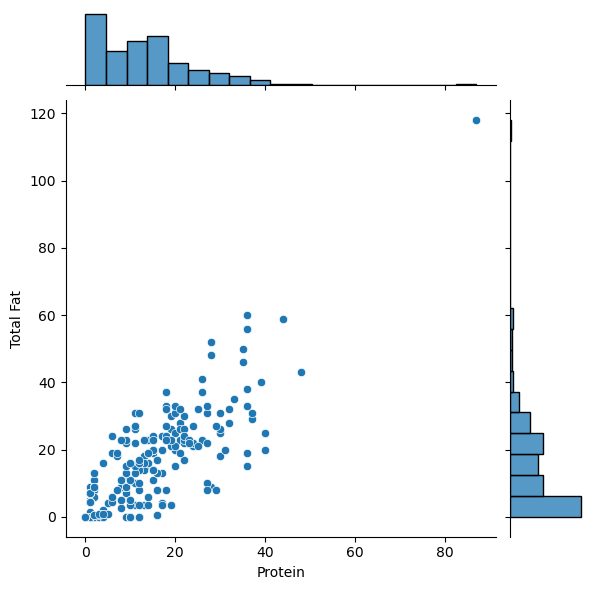

In [18]:
import seaborn as sns
sns.jointplot(x='Protein', y='Total Fat', data=df, kind='scatter')


### Swarm Plot (Sodium Content by Category):

- Create a categorical scatter plot to observe sodium content across food categories:

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 48.1% of the points cannot be placed; you may want to decrease the size of

<Axes: xlabel='Category', ylabel='Sodium'>

C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


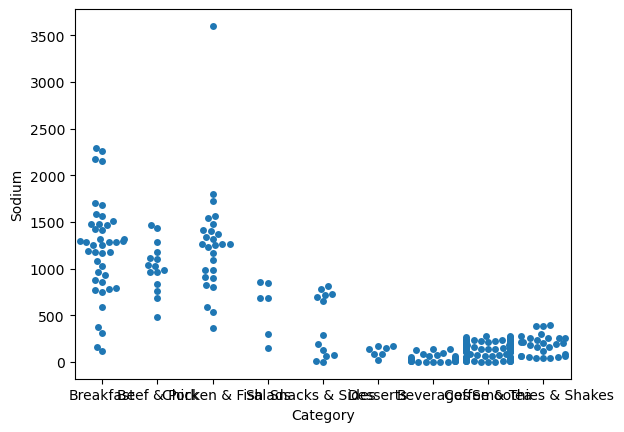

In [19]:
sns.swarmplot(x='Category', y='Sodium', data=df)


### Box Plot (Sugar Distribution):

- Use a box plot to show the distribution of sugar content

<Axes: xlabel='Sugars'>

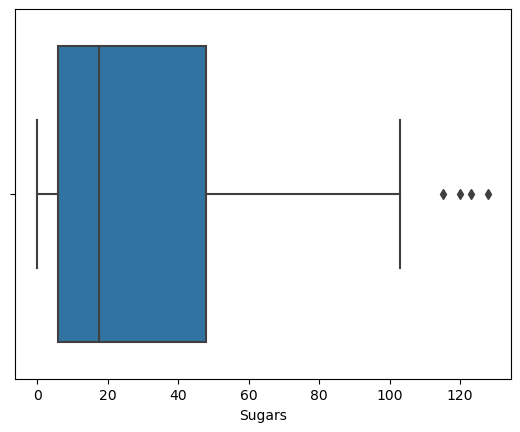

In [20]:
sns.boxplot(x='Sugars', data=df)


# Step 6: Conclusion and Insights
### Summarize Findings:

- Highlight key insights such as high-sodium items, the correlation between protein and fat, and categories with high sugar content.